##IMPORT LIBRARY

In [3]:
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import csv
import sklearn.neighbors



##load dataset

In [4]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


##drop field

In [5]:
df = df.drop(['id','age'], axis=1)

In [6]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             398 non-null    obj

##breakdown dalam satu datatype

In [8]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)
        
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [10]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

##breakdown classification type numerical

In [11]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

##anomali 2 ckd\t

In [12]:
df['classification'] = df['classification'].replace(['ckd\t'], 'ckd')

In [13]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

##Transform Index & Label Data

In [48]:
index_col = [col for col in df.columns if col != 'classification']
label_col = 'classification'

In [49]:
df[label_col].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

##TRANSFORM DATASET MODELING

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])
    

In [51]:
df['classification'] = le.fit_transform(df['classification'])

In [52]:
x = df[index_col]
y = df[label_col]

##DATASET CLEAN

In [61]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


##EXPORT DATASET CLEAN

In [62]:
df.to_csv('kidney_disease_updated.csv')

##Learning Model 1 DecisionTreeClassifier

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, 
    min_samples_split=2,min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn,fp,fn,tp = confusion.ravel()
print(f"classification_report : \n{classification_report(y_test, dtc.predict(x_test))}\n")




Akurasi Data Training = 0.99375
Akurasi Data Testing = 1.0 

Confusion Matrix : 
[[52  0]
 [ 0 28]]

classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80




## SIMULASI MODEL

In [139]:
input_data = (60,1,0.6,0,1,1,0,0,91,36,1.7,135,3.7,10,34,83,40,0,3,1,0,0,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak terkena batu ginjal')
else:
    print('Pasien terkena batu ginjal')

[0]
Pasien tidak terkena batu ginjal


/Users/densu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##VISUALISASI

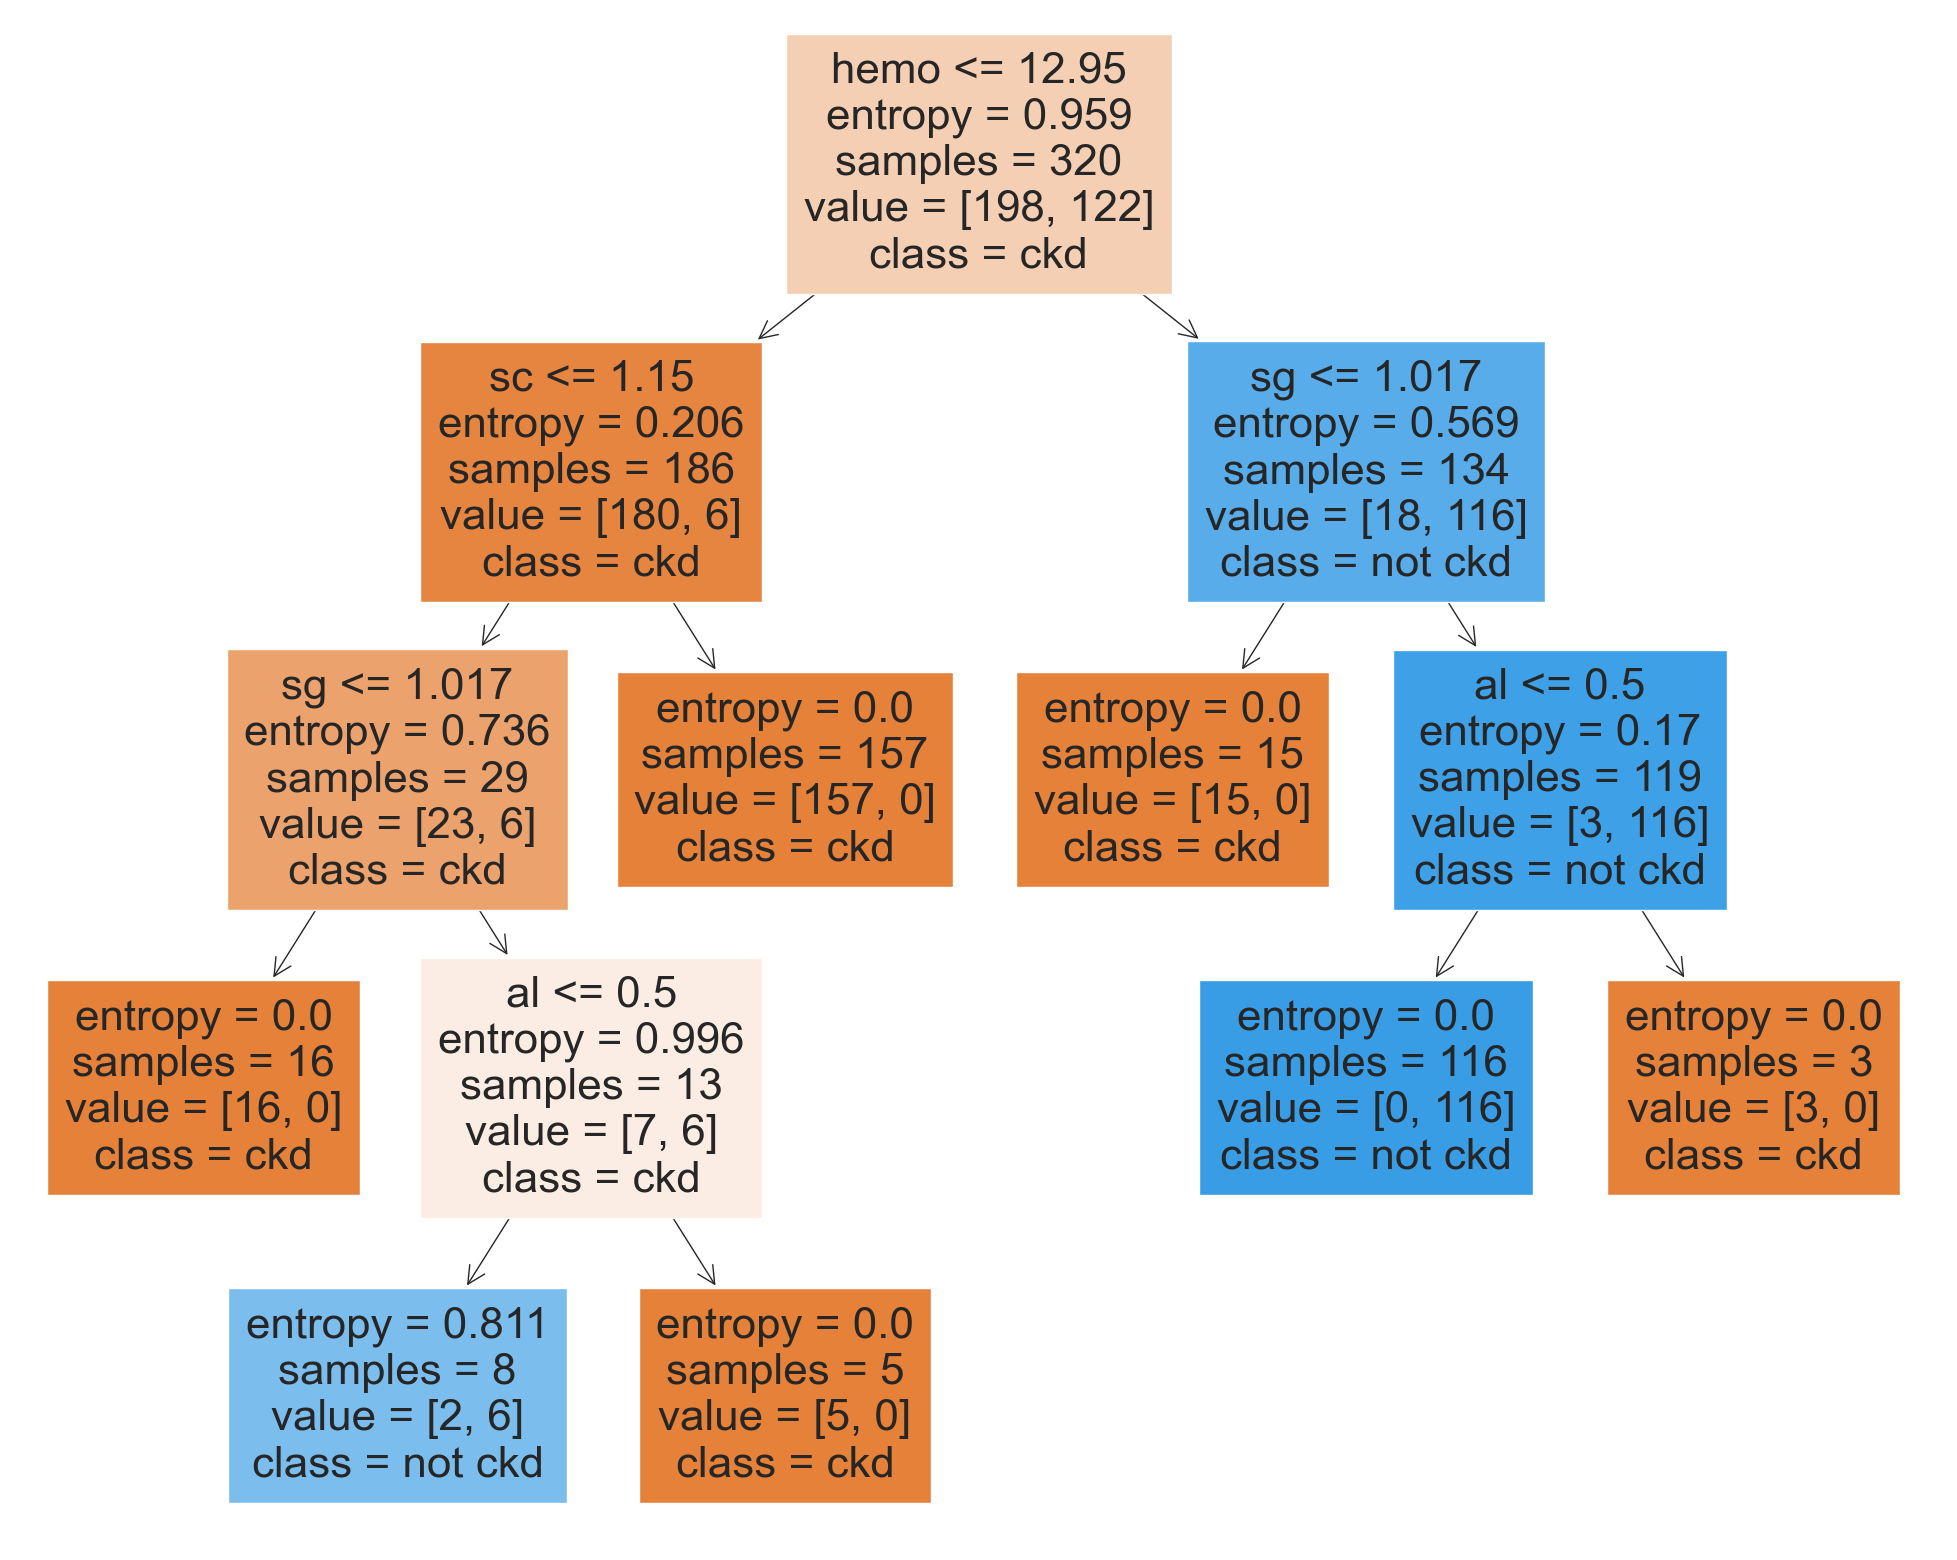

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=index_col,
                   class_names=['ckd', 'not ckd'],
                   filled=True
)